# Importing Libraires

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Divided Dataset into training and testing data

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

# Creating a Convolutional neural network

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(10,input_shape=(100,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5050 - accuracy: 0.8474
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1186 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.023

In [28]:
model.evaluate(x_test,y_test) #evaluating the model

313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9755


[0.0912594273686409, 0.9754999876022339]

In [29]:
y_predicted = model.predict(x_test) #storing the preditcion of the model

In [24]:
y_prediced_int = [np.argmax(i) for i in y_predicted] #converting the y_predicted data into the int values
model.save('model.h5')

# Representation of Confusion Matrix

Text(69.0, 0.5, 'Truth')

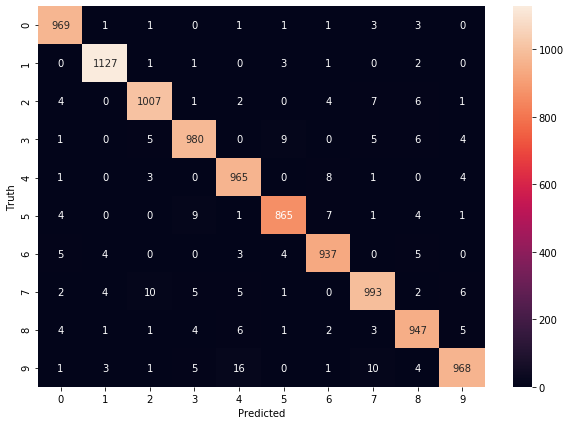

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_int)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')